In [89]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow library
import cv2  # OpenCV library for computer vision
import os  # Operating system module for file operations
import matplotlib.pyplot as plt  # Library for plotting
import numpy as np  # NumPy library for numerical operations

In [90]:
# Read an image to check its shape and display it
img_array = cv2.imread("candidate_frames/C01/frame1.jpg")

In [91]:
img_array.shape  # Check the shape of the image (height, width, channels) #RGB

(658, 1280, 3)

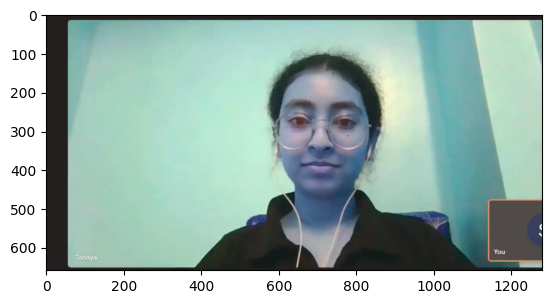

In [92]:
plt.imshow(img_array)  # Display the image using Matplotlib

In [93]:
# Set up data directory and classes
Datadirectory = "candidate_frames/"

In [94]:
Classes = ["C01","C03", "C06", "C07","C08","C09","C10","C11","C12","C13","C15","C16","C17","C18","C20","C22","C24","C25","C26","C27","C28",]##list of classes = > exact name of your folders

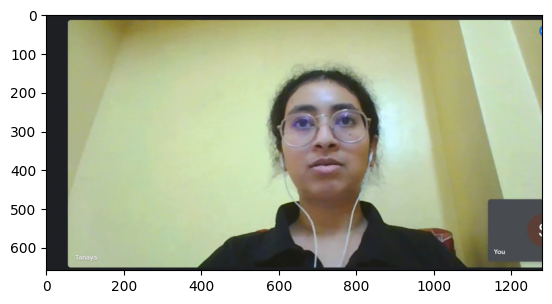

In [95]:
# Loop through the classes and display the first image of each class
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break   

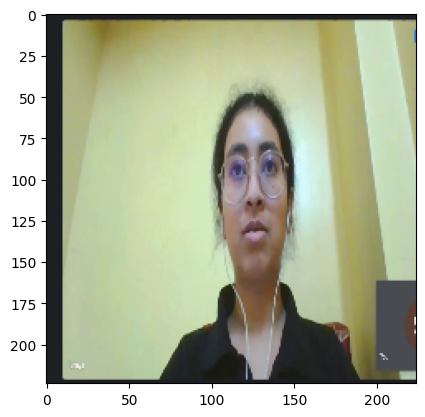

In [96]:
# Resize images to a standard size (224x224) and create a training dataset
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
new_array.shape 

(224, 224, 3)

In [98]:
#read all images and converting them to array
training_Data = []  # Array to store image data and labels
def create_traingin_Data(): 
    for category in Classes :
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1, ##label
        for img in os.listdir(path) :
            try :
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e :
                pass
                

In [99]:
create_traingin_Data()  # Function to populate training_Data array with images and labels

In [100]:
# Display the number of training samples
print(len(training_Data))

5004


In [101]:
import random
# Shuffle the data
random.shuffle(training_Data)

In [102]:
# Separate features (X) and labels (y)
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)  # Convert X to a 4-dimensional array

In [103]:
X.shape

(5004, 224, 224, 3)

In [104]:
#Normalize the pixel values of images to the range [0,1]
X = X / 255.0

In [105]:
type(y)

list

In [106]:
# Convert labels to NumPy array
Y = np.array(y)

In [107]:
Y.shape

(5004,)

In [108]:
# deep learning model for training - Tranfer Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
# Load a pre-trained MobileNetV2 model for transfer learning
model = tf.keras.applications.MobileNetV2()


In [110]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [111]:
# Create a new model for transfer learning with additional layers
base_input = model.layers[0].input

In [112]:
base_output = model.layers[-2].output

In [113]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [114]:
final_output = layers.Dense(128)(base_output) # adding new layer, after the output of global pooling layer 
final_output = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) ## my classes are 07, classification layer

In [116]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [117]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [118]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [119]:
# Compile and train the new model on the prepared data
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
##new_model.fit(X,Y, epochs = 25)

In [120]:
# Save the trained model
new_model.save('Final_model_95p07.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
##new_model.fit(X,Y, epochs = 25)

In [35]:
##new_model.save('Final_model_95p07.h5')

In [121]:
# Load the trained model
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [122]:
frame = cv2.imread("surpsised_man.jpg")

In [123]:
frame.shape

(892, 1300, 3)

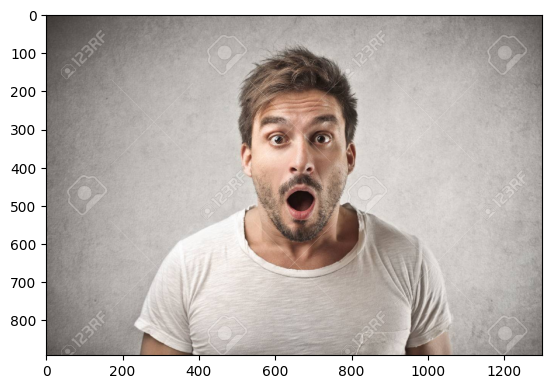

In [124]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
# face detection algorithm(gray images)

In [125]:
# Detect faces in the image using Haar Cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [126]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [127]:
gray.shape

(892, 1300)

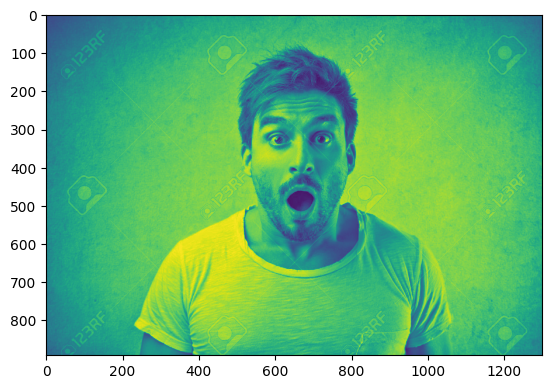

In [128]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

In [129]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces :
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0),2) ##BGR - Blue,Green,Red
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("face not detected")
    else:
            for(ex,ey,ew,eh) in faces :
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    

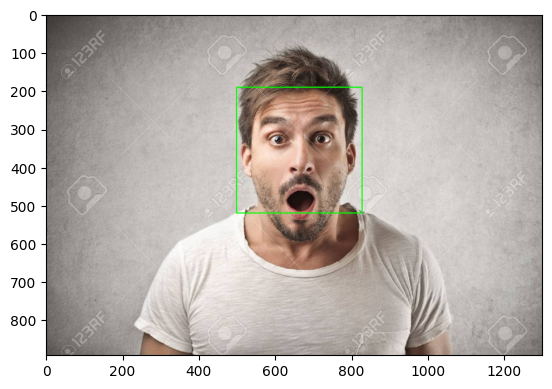

In [130]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

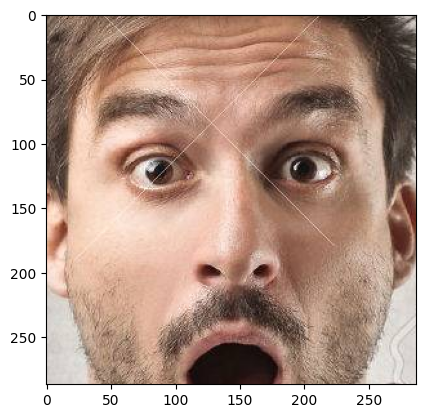

In [131]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [132]:
# Preprocess the detected face for model prediction
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [133]:
# Make predictions using the trained model
predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 551ms/step


In [134]:
predictions[0]

array([0.31426758, 0.03124116, 0.10273416, 0.05580501, 0.14325988,
       0.26412112, 0.08857109], dtype=float32)

In [136]:
np.argmax(predictions)

0

In [52]:
# open webcam

In [137]:
import cv2 ### pip install opencv-python ## pip install opencv-contrib-python fullpackage #from deepface import DeepFace ## pip install deepface
path = "haarcascade_frontalface_default.xm]"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros ( (500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape [0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle (img, box_coords [0], box_coords [1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# Open webcam for real-time face emotion recognition
cap = cv2.VideoCapture(1)  # Use the default camera (or 0 for an external camera)
# Check if the webcam is opened correctly
if not cap.isOpened() :
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
# Process each frame from the webcam
while True:
    ret, frame = cap. read ()
    #eye_cascade = cv2. CascadeClassifier (cv2. data. haarcascades + 'haarcascade_eye. xml')
    faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor (frame, cv2. COLOR_BGR2GRAY)
    #print (faceCascade.empty ())
    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(frame, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
                
    final_image =cv2. resize(face_roi, (224,224))
    final_image = np.expand_dims (final_image, axis =0)
     ## need fourth dimension
    final_image=final_image/255.0
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict (final_image)
        
    font_scale = 1.5
    font = cv2. FONT_HERSHEY_PLAIN     
     
    
     
        
    
    if (np.argmax (Predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0, 175, 75
        
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        # Add text
        cv2.putText (frame, status, (x1 + int(w1/10),y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
        
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
     
    elif (np.argmax(Predictions)==1):
            status = "Disgust"
            
            x1,y1,w1, h1 = 0,0, 175, 75
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
            
        
    elif (np.argmax(Predictions)==2):
            status = "Fear"
            
            x1,y1,w1, h1 = 0,0, 175, 75
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))    
            
         
    elif (np.argmax(Predictions)==3):
            status = "Happy"
            
            x1,y1,w1, h1 = 0,0, 175, 75
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255)) 
          
        
    elif (np.argmax(Predictions)==4): 
            status = "sad" 
            
            x1,y1,w1, h1 = 0,0, 175, 75 
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1) 
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255)) 
            
            
            
            
         
    elif (np.argmax(Predictions)==5):
            status = "surprise"
            
            x1,y1,w1, h1 = 0,0, 175, 75
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))  
            
            
            
            
          
    else :
            status = "Neutral"
            
            x1,y1,w1, h1 = 0,0, 175, 75
            
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            
            # Add text
            cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4) 
            
            cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))  
            
            
            
            
           
    cv2.imshow('Face Emotion Recognition', frame)
        
    
    if cv2.waitKey(2) & 0xFF == ord('q') :
            break

cap.release()
cv2.destroyAllWindows()

OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!
OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!


OSError: Cannot open webcam